In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
#def Campo(x):
#    if (x<12):
#        B=-3322.64034094*x**2+78007.86994389*x-477598.97217823
#    else:
#        B=8.46125856e+01*x**2.11913179e+00-3.18617790e+04
#    return B

def Campo(x):
    if (x<9.10664587):
        B=-2773.91667912*x**2+61598.70719434*x-361712.29899906

    else:
        #B=8.46125856e+01*x**2.11913179e+00-3.18617790e+04
        B= 1.14810873e+03*x**1.37195638e+00-5.45766767e+04
    return B


In [65]:
from scipy import optimize

def fun(x):
    return -2773.91667912*x**2+61598.70719434*x-361712.29899906-(1.14810873e+03*x**1.37195638e+00-5.45766767e+04)

sol = optimize.root(fun, 10e-6, method='hybr')

sol.x

array([9.10664587])

/home/gus/.local/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<Figure size 432x288 with 0 Axes>

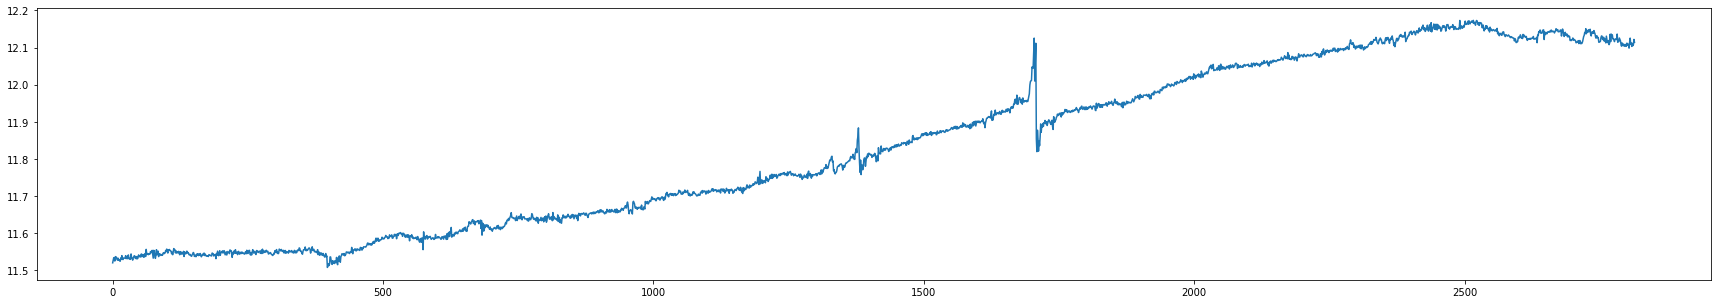

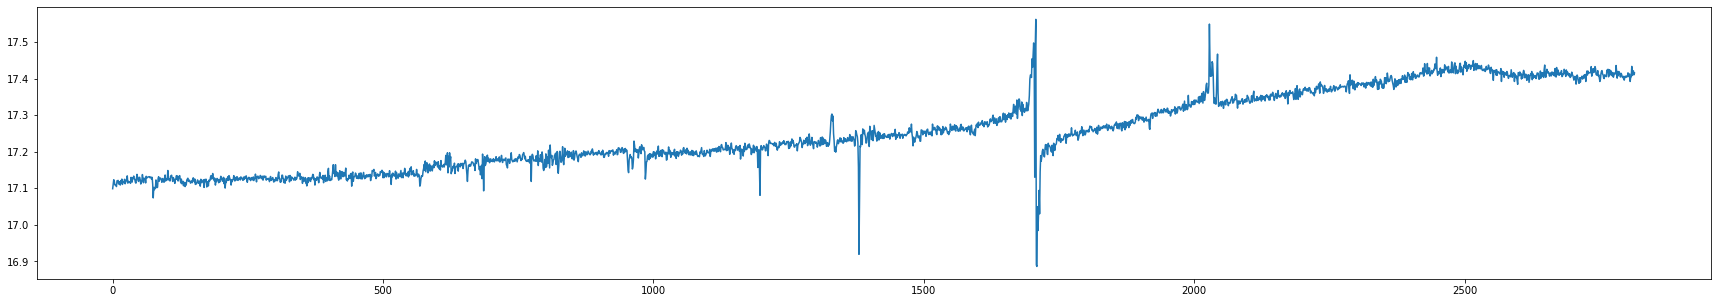

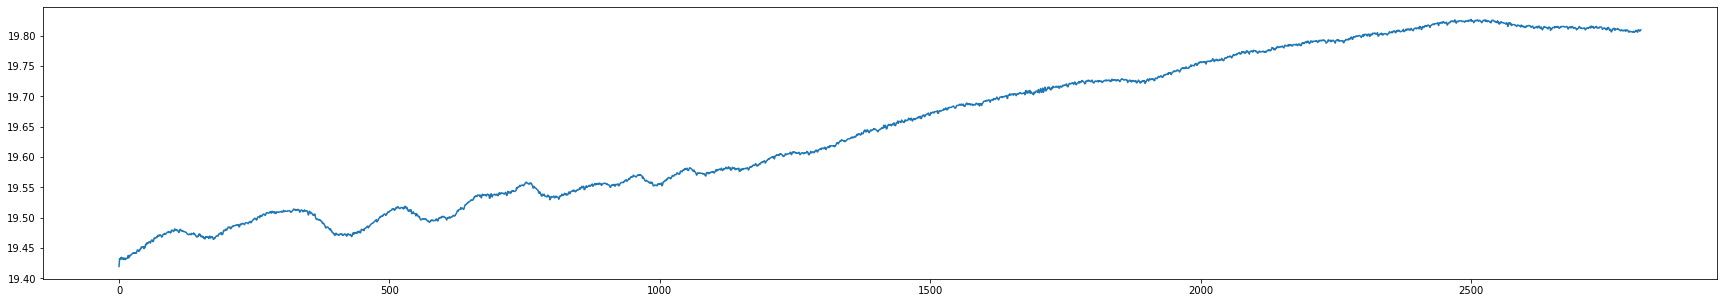

In [66]:
Sens = pd.read_csv("Datos_campovete.csv", names=['Z','X','Y','fecha'], header=0, delimiter='\t')

Sens=Sens[(Sens.Z != 'ovf') & (Sens.Y != 'ovf') & (Sens.X != 'ovf')]

Sens.head(20)

CZ = 1e6/Sens.Z
CY = 1e6/Sens.Y
CX = 1e6/Sens.X

plt.figure(1)
fig=plt.figure(figsize=(30,5))
plt.plot(CX)

plt.figure(2)
fig=plt.figure(figsize=(30,5))
plt.plot(CY)

plt.figure(3)
fig=plt.figure(figsize=(30,5))
plt.plot(CZ)

In [67]:
#Convertir periodo a valores de campo
Datos= pd.DataFrame(columns=['Campo_Z','Campo_Y','Campo_X','Fecha'])


for i in range(0,np.size(CZ)):
    C=Campo(CZ.iloc[i])
    Datos.loc[i,'Campo_Z'] = C
    C=Campo(CY.iloc[i])
    Datos.loc[i,'Campo_Y'] = C
    C=Campo(CX.iloc[i])
    Datos.loc[i,'Campo_X'] = C
    Datos.loc[i,'Fecha'] = Sens.fecha[i]


<Figure size 432x288 with 0 Axes>

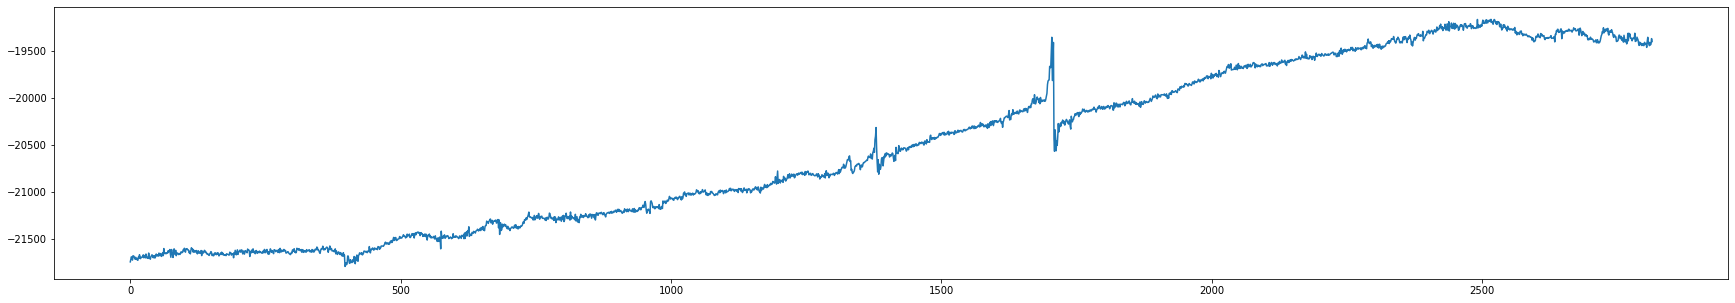

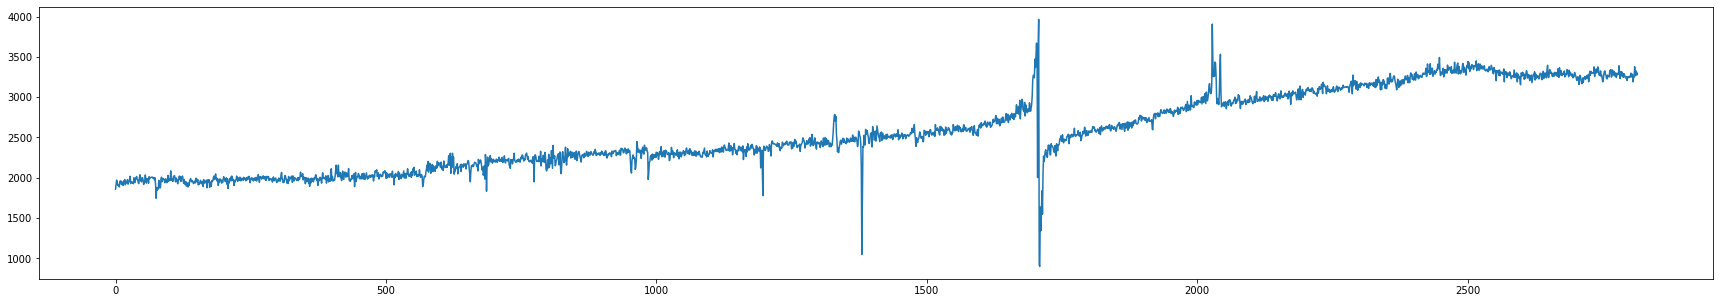

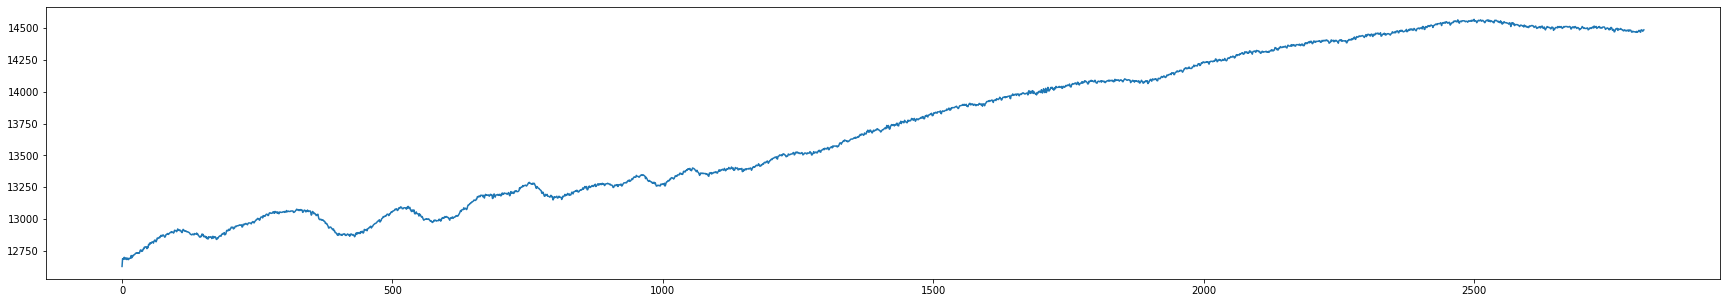

In [68]:
plt.figure(1)
fig=plt.figure(figsize=(30,5))
plt.plot(Datos.Campo_X)

plt.figure(2)
fig=plt.figure(figsize=(30,5))
plt.plot(Datos.Campo_Y)

plt.figure(3)
fig=plt.figure(figsize=(30,5))
plt.plot(Datos.Campo_Z)

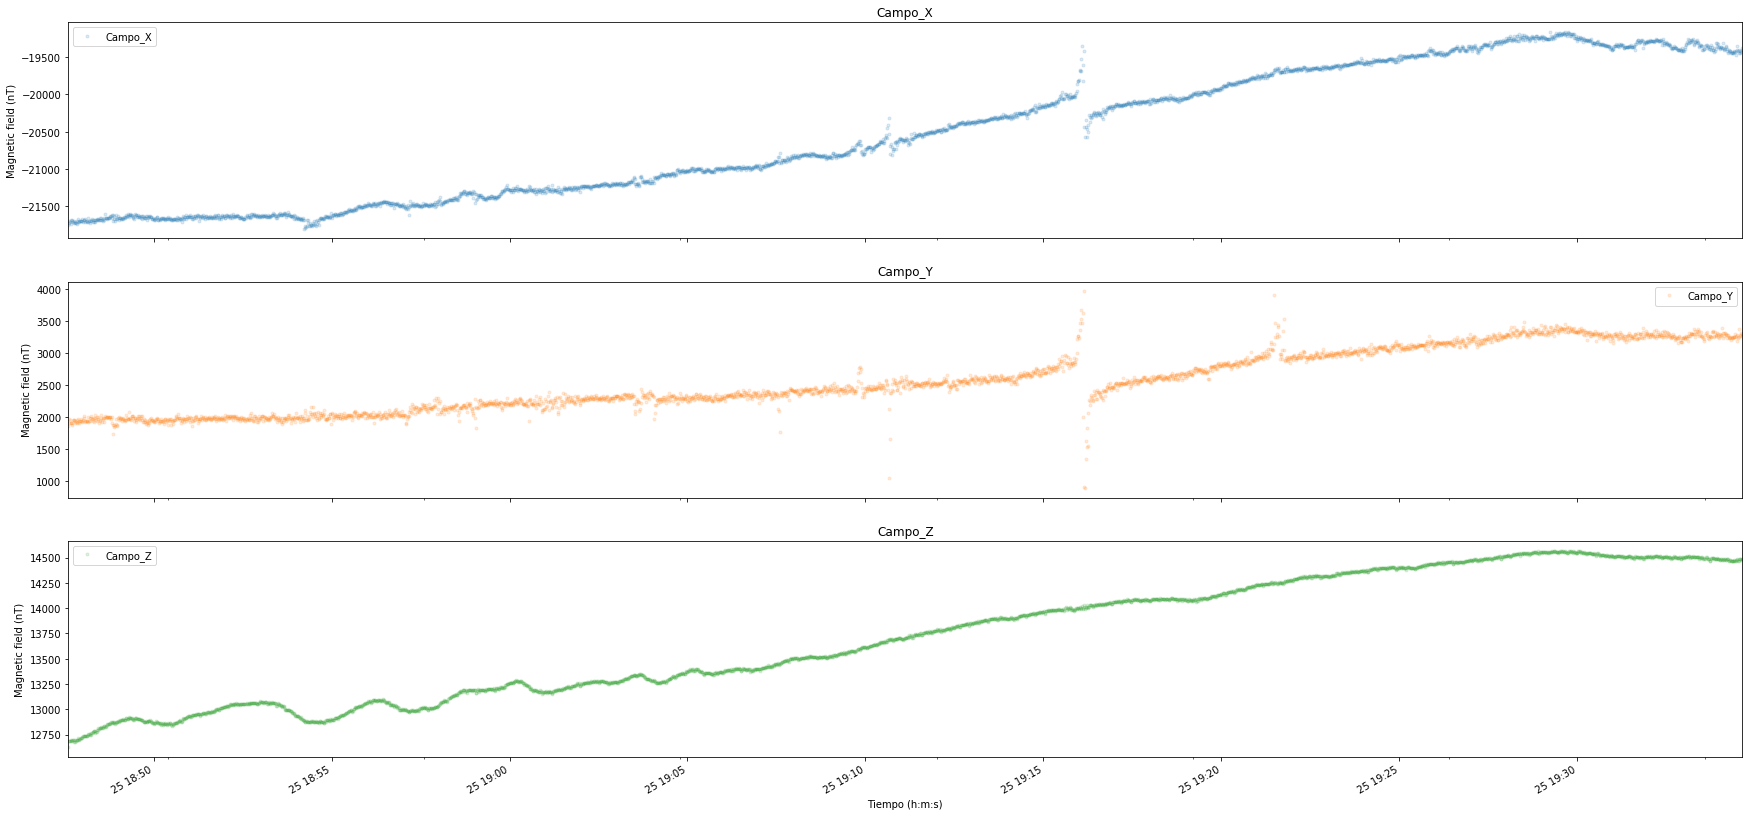

In [69]:
import datetime

Datos = Datos.reset_index()

Datos['Fecha'] = pd.to_datetime(Datos.Fecha)

Datos = Datos.set_index('Fecha')

import seaborn as sns

Colplot = ['Campo_X','Campo_Y','Campo_Z']

axes = Datos[Colplot].plot(marker='.', alpha=0.15, linestyle='None', figsize=(30, 15), subplots=True)

for i in range(len(axes)):
    axes[i].set_title(str(Colplot[i]))
    axes[i].set_xlabel('Tiempo (h:m:s)');
    axes[i].set_ylabel('Magnetic field (nT)');
    

In [70]:
#Delete non valid data as NaN
Datos = Datos.dropna()

s = 1.75

ThresH_X = Datos.Campo_X.mean() + s*Datos.Campo_X.std()
ThresH_Y_inf = Datos.Campo_Y.mean() - s*Datos.Campo_Y.std()
ThresH_Y_sup = Datos.Campo_Y.mean() + s*Datos.Campo_Y.std()

ThresH_Z = Datos.Campo_Z.mean() + s*Datos.Campo_Z.std()

print(ThresH_X, ThresH_Y, ThresH_Z)

Datos = Datos[(Datos.Campo_Y.values < ThresH_Y_sup)&(Datos.Campo_Y.values > ThresH_Y_inf)]


-19005.99593765126 3038.0041638119114 14752.87506861089


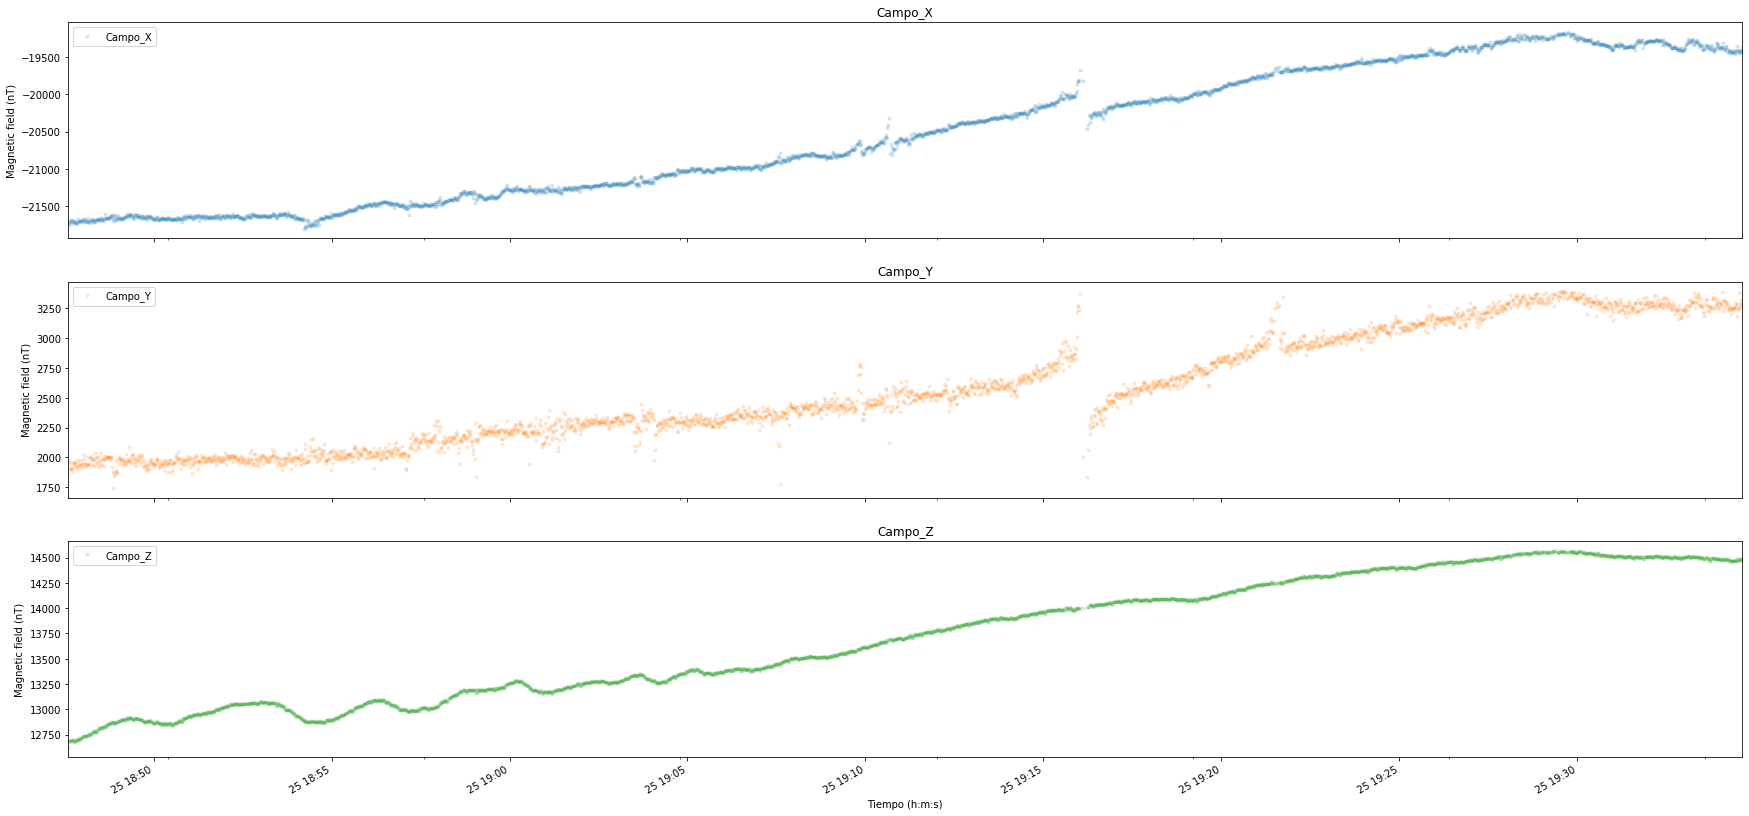

In [71]:
import datetime

Datos = Datos.reset_index()

Datos['Fecha'] = pd.to_datetime(Datos.Fecha)

Datos = Datos.set_index('Fecha')

import seaborn as sns

Colplot = ['Campo_X','Campo_Y','Campo_Z']

axes = Datos[Colplot].plot(marker='.', alpha=0.15, linestyle='None', figsize=(30, 15), subplots=True)

for i in range(len(axes)):
    axes[i].set_title(str(Colplot[i]))
    axes[i].set_xlabel('Tiempo (h:m:s)');
    axes[i].set_ylabel('Magnetic field (nT)');
  

Componente Horizontal(nT) Media= 20702.78023878817 Desviacion 799.3792880347867 Coef. Variacion 3.861217086858176
Modulo Campo Terrestre Media= 24846.05192163194 Desviacion 339.88433900161664 Coef. Variacion 1.3679611556542715
Datos X(nT) Media= -20536.428279414675 Desviacion= 863.8747162514062 Coef Variacion -4.206548015544348
Datos Y(nT) Media= 2557.2220876133397 Desviacion= 462.1320757080925 Coef Variacion 18.071644146457423
Datos z(nT) Media= 13705.707235551743 Desviacion= 592.6970288237281 Coef Variacion 4.3244541754569905


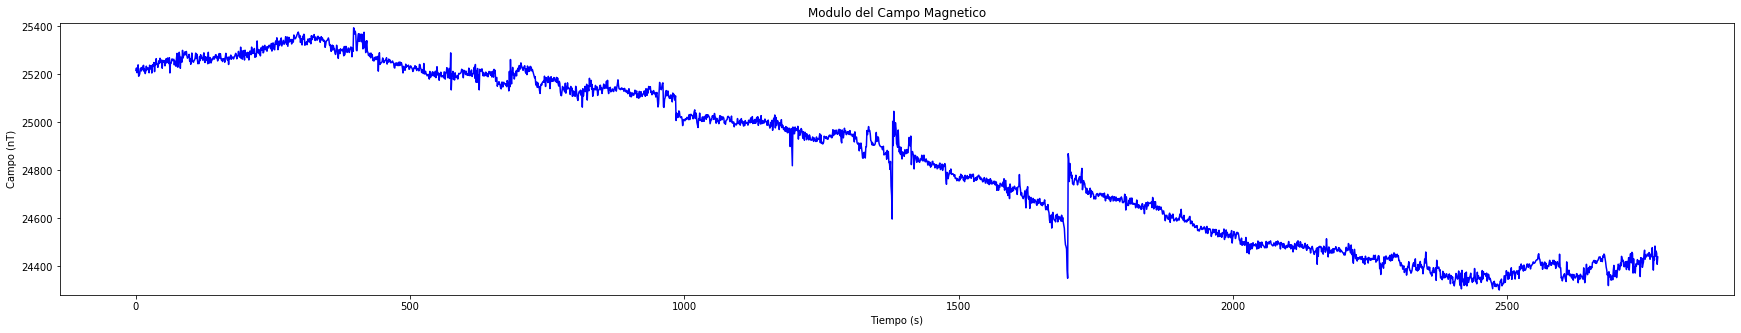

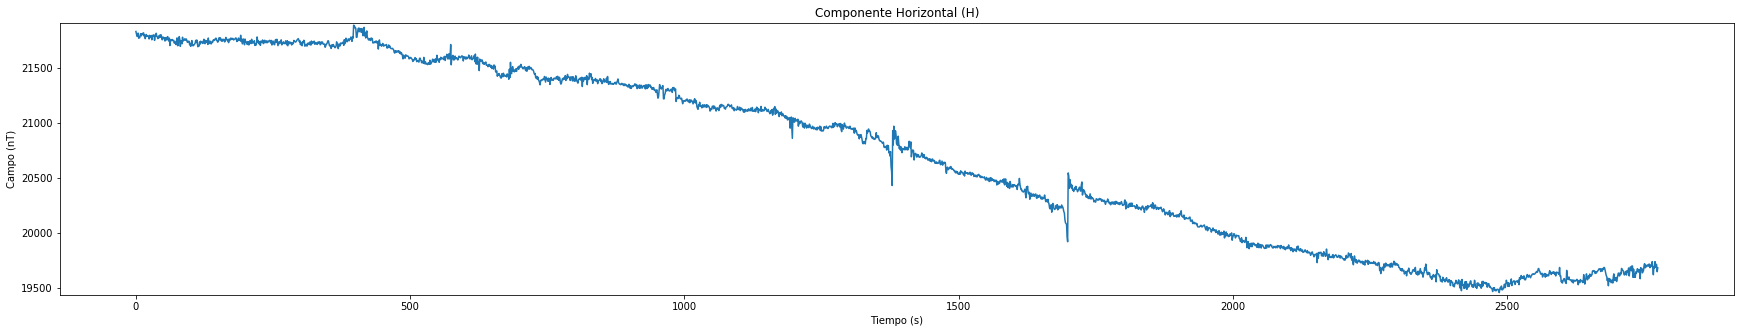

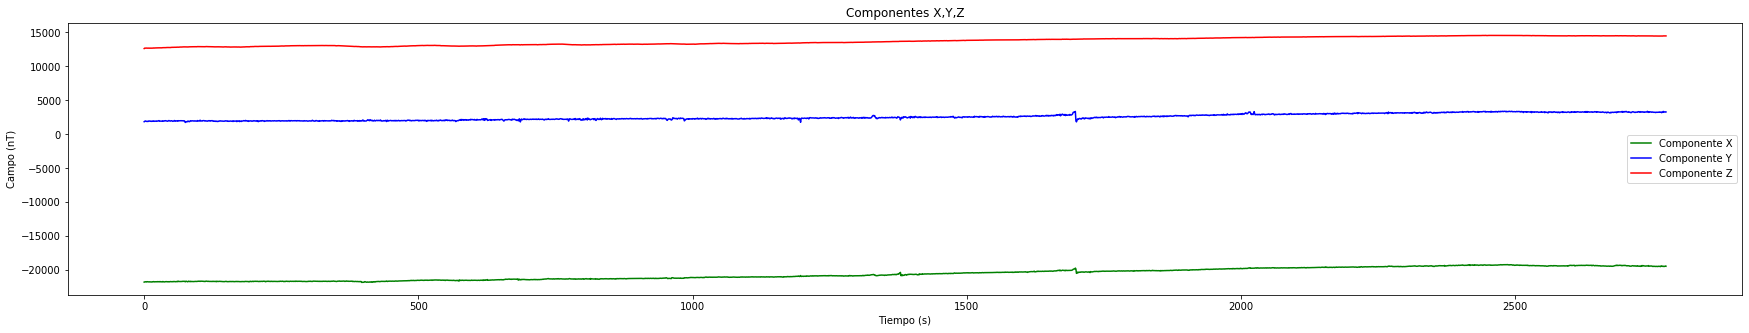

In [72]:
N=len(Datos)
D= Datos.iloc[0:N]

X=np.array(list(D.Campo_X))
Y=np.array(list(D.Campo_Y))
Z=np.array(list(D.Campo_Z))

R=np.sqrt(X**2+Y**2+Z**2)
H=np.sqrt(X**2+Y**2)

Rm=R.mean()
Rd= R.std()

Xm=X.mean()
Ym=Y.mean()
Zm=Z.mean()
Xd=X.std()
Yd=Y.std()
Zd=Z.std()

Hm=H.mean()
Hd= H.std()

fig=plt.figure(figsize=(30,5))
plt.figure(1)
plt.plot(R,'b')
plt.xlabel('Tiempo (s)')
plt.ylabel('Campo (nT)')
plt.ylim(min(R)-20,max(R)+20)
plt.title('Modulo del Campo Magnetico')

plt.savefig("Registro_mod_vete_seg.pdf", dpi=500)
  
fig=plt.figure(figsize=(30,5))
plt.figure(2)
plt.plot(H)
plt.xlabel('Tiempo (s)')
plt.ylabel('Campo (nT)')
plt.ylim(min(H)-20,max(H)+20)
plt.title('Componente Horizontal (H)')

plt.savefig("Registro_hor_vete_seg.pdf", dpi=500)
  
fig=plt.figure(figsize=(30,5))
plt.figure(3)
pX,=plt.plot(X,'g')
pY,=plt.plot(Y,'b')
pZ,=plt.plot(Z,'r')
plt.xlabel('Tiempo (s)')
plt.ylabel('Campo (nT)')

plt.legend([pX,pY,pZ], ['Componente X','Componente Y','Componente Z'])

plt.title('Componentes X,Y,Z')

plt.savefig("Registro_comp_vete_seg.pdf", dpi=500)
    
print('Componente Horizontal(nT)','Media=',Hm,'Desviacion',Hd,'Coef. Variacion',Hd*100/Hm)
print('Modulo Campo Terrestre','Media=',Rm,'Desviacion',Rd,'Coef. Variacion',Rd*100/Rm)

print('Datos X(nT)','Media=',Xm,'Desviacion=',Xd,'Coef Variacion',Xd*100/Xm)
print('Datos Y(nT)','Media=',Ym,'Desviacion=',Yd,'Coef Variacion',Yd*100/Ym)
print('Datos z(nT)','Media=',Zm,'Desviacion=',Zd,'Coef Variacion',Zd*100/Zm)


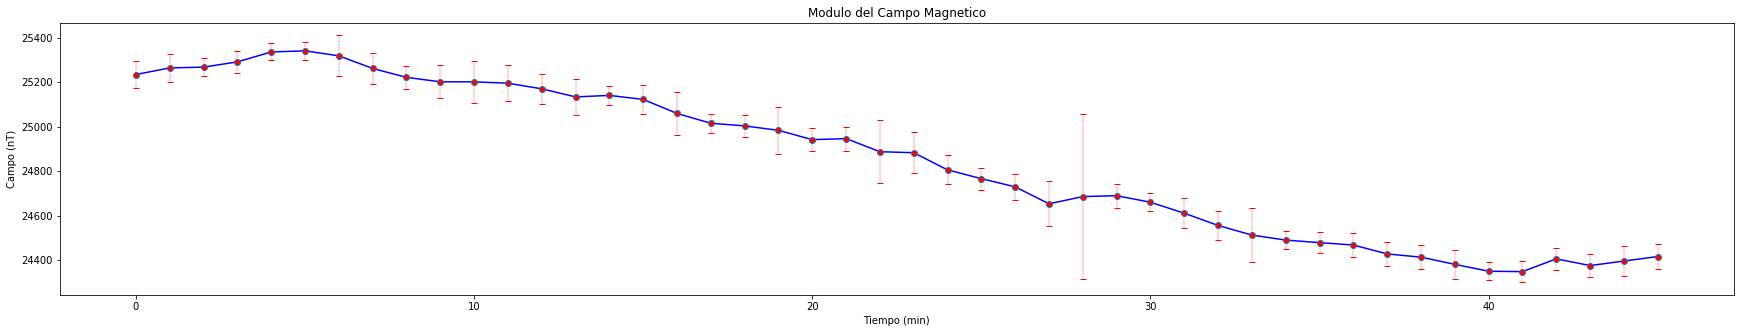

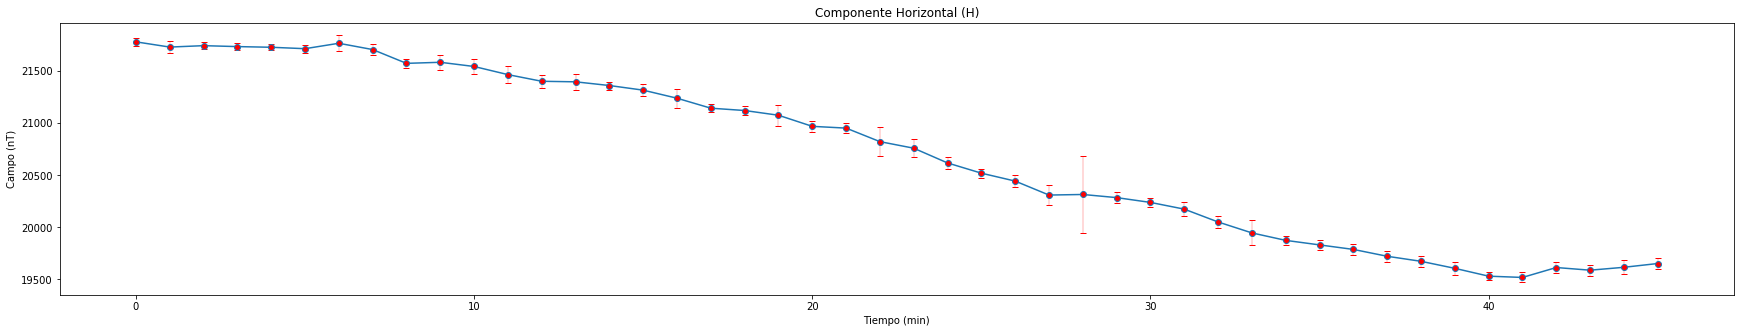

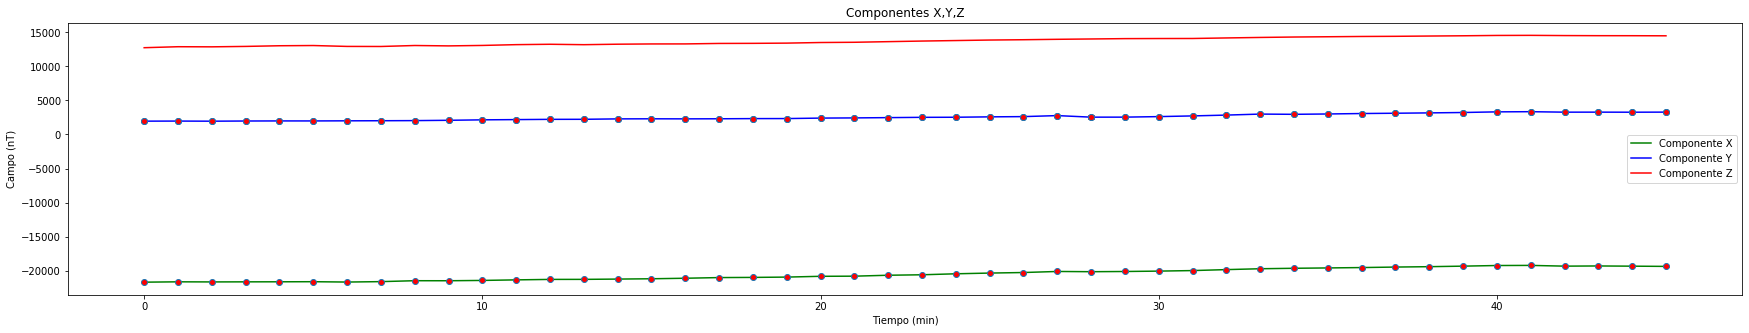

In [73]:
Xs=np.array(list(Datos.Campo_X))
Ys=np.array(list(Datos.Campo_Y))
Zs=np.array(list(Datos.Campo_Z))

C=len(Xs)%60
N=int((len(Xs)-C)/60)

Datos_m = pd.DataFrame(columns=['X_m','Y_m','Z_m','X_std','Y_std','Z_std','R_m','H_m','R_std','H_std'])

for i in range(0,N):
    Xminu=[]
    Yminu=[]
    Zminu=[]
    
    for q in range(0,60): 
        Xminu.append(Xs[60*i+q])
        Yminu.append(Ys[60*i+q])
        Zminu.append(Zs[60*i+q])
        
    Datos_m.loc[i,'X_m']=np.array(Xminu).mean()
    Datos_m.loc[i,'X_std']=np.array(Xminu).std()
    Datos_m.loc[i,'Y_m']=np.array(Yminu).mean()
    Datos_m.loc[i,'Y_std']=np.array(Yminu).std() 
    Datos_m.loc[i,'Z_m']=np.array(Zminu).mean()
    Datos_m.loc[i,'Z_std']=np.array(Zminu).std()
    Datos_m.loc[i,'R_m']=np.sqrt((np.array(Xminu).mean())**2+(np.array(Yminu).mean())**2+(np.array(Zminu).mean())**2)
    Datos_m.loc[i,'R_std']=np.sqrt((np.array(Xminu).std())**2+(np.array(Yminu).std())**2+(np.array(Zminu).std())**2)
    Datos_m.loc[i,'H_m']=np.sqrt((np.array(Xminu).mean())**2+(np.array(Yminu).mean())**2)
    Datos_m.loc[i,'H_std']=np.sqrt((np.array(Xminu).std())**2+(np.array(Yminu).std())**2)

t=range(0,len(Datos_m))
fig=plt.figure(figsize=(30,5))
plt.figure(1)
m=plt.plot(Datos_m.R_m,'b')
e=plt.errorbar(t,Datos_m.R_m, yerr=Datos_m.R_std, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=3, lw=0.3)

plt.xlabel('Tiempo (min)')
plt.ylabel('Campo (nT)')
plt.title('Modulo del Campo Magnetico')

plt.savefig("Modulo_medio_min.pdf", dpi=500)

fig=plt.figure(figsize=(30,5))
plt.figure(2)
m=plt.plot(Datos_m.H_m)
e=plt.errorbar(t,Datos_m.H_m, yerr=Datos_m.H_std, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=3, lw=0.3)

plt.xlabel('Tiempo (min)')
plt.ylabel('Campo (nT)')
plt.title('Componente Horizontal (H)')

plt.savefig("Componente_horizontal_media_min.pdf", dpi=500)

fig=plt.figure(figsize=(30,5))
plt.figure(3)
pX, =pX,=plt.plot(Datos_m.X_m,'g')
xe=plt.errorbar(t,Datos_m.X_m, yerr=Datos_m.X_std, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=3, lw=0.3)

pY,=plt.plot(Datos_m.Y_m,'b')
ye=plt.errorbar(t, Datos_m.Y_m, yerr=Datos_m.Y_std, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=3, lw=0.3)

pZ,=plt.plot(Datos_m.Z_m,'r')
ze=plt.errorbar(t,Datos_m.Y_m, yerr=Datos_m.Y_std, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=3, lw=0.3)

plt.xlabel('Tiempo (min)')
plt.ylabel('Campo (nT)')

plt.legend([pX,pY,pZ], ['Componente X','Componente Y','Componente Z'])

plt.title('Componentes X,Y,Z')

plt.savefig("Componentes_media_min.pdf", dpi=500)


In [74]:
Datos_m.mean()

X_m     -20542.900839
Y_m       2553.069491
Z_m      13701.237873
X_std       36.517608
Y_std       54.741553
Z_std       20.563201
R_m      24848.258242
H_m      20708.497098
R_std       70.971287
H_std       66.627748
dtype: float64

In [75]:
Datos_m.std()

X_m      870.578112
Y_m      459.701286
Z_m      597.560998
X_std     24.129446
Y_std     46.057422
Z_std     11.114537
R_m      341.965382
H_m      805.831576
R_std     50.367004
H_std     50.911773
dtype: float64

In [16]:
Campo(16.5002)-Campo(16.5)

0.8937276991346152